In [1]:
import numpy as np

# For nice plot display
from IPython.display import display

# DataFrame framework
import pandas as pd

# Plot libs
import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf

import plotly as py
import plotly.offline
import plotly.graph_objs as go
import plotly.offline

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Utils for DataSet formatation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


# Machine learning frameworks
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor



In [2]:
data = pd.read_csv('CDNOW_master.txt', delim_whitespace=True, names=['id', 'date', 'quantity', 'cost'])
# Sort dataframe by date
# data = data.drop(data[data.cost == 0].index)
data = data.sort_values(['date'])
# Add year/month columns for later
data['year'] = [str(x)[:4] for x in data['date']]
data['month'] = [str(x)[4:6] for x in data['date']]
data['day'] = [str(x)[6:8] for x in data['date']]
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
# Number of days between purchase date and last purchase date i.e 30.06.1998
data['day_to_last_date'] = (data['date'].max() - data['date']).dt.days


In [3]:
# Small preview
print('Small preview')
display(data.head(), data.tail())
display(data.describe())
print(data.id.nunique())


Small preview


,id,date,quantity,cost,year,month,day,day_to_last_date
0,1,1997-01-01,1,11.77,1997,01,01,545
802,216,1997-01-01,1,13.97,1997,01,01,545
337,89,1997-01-01,3,47.08,1997,01,01,545
803,217,1997-01-01,2,57.54,1997,01,01,545
808,219,1997-01-01,3,38.51,1997,01,01,545


,id,date,quantity,cost,year,month,day,day_to_last_date
35093,11515,1998-06-30,4,47.46,1998,06,30,0
56656,18912,1998-06-30,3,40.36,1998,06,30,0
26992,8631,1998-06-30,2,29.91,1998,06,30,0
8972,2844,1998-06-30,2,33.48,1998,06,30,0
53628,17786,1998-06-30,2,27.98,1998,06,30,0


,id,quantity,cost,day_to_last_date
count,69659.000000,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648,362.057738
std,6819.904848,2.333924,36.281942,159.511302
min,1.000000,1.000000,0.000000,0.000000
25%,5506.000000,1.000000,14.490000,235.000000
50%,11410.000000,2.000000,25.980000,432.000000
75%,17273.000000,3.000000,43.700000,493.000000
max,23570.000000,99.000000,1286.010000,545.000000


23570


In [4]:
total = data['quantity'].sum()
print('A total of : ',total, 'CDs were sold from 1997-01 to 1998-06')
# Sample has been collected on a period of 18 months from 1997-01 to 1998-06
# Average number CD's sold each month
avr_month = total / 18
print('On average', np.ceil(avr_month), 'CDs were sold each month')
# Average number CD's sold each day
total_work_days = data['date'].nunique()
avr_day = total / total_work_days
print('On average', np.ceil(avr_day), 'CDs were sold each day')
total_profit = data['cost'].sum()
print('Total revenue', total_profit)
# About 2.5 million

A total of :  167881 CDs were sold from 1997-01 to 1998-06
On average 9327.0 CDs were sold each month
On average 308.0 CDs were sold each day
Total revenue 2500315.6300000004


<h1><font color=red >Analysis by year/month/day</font></h1>

In [5]:
# Let's group the dataframe by year
group_year = data.groupby('year')

month
01    627.0
02    891.0
03    844.0
04    325.0
05    235.0
06    244.0
07    263.0
08    189.0
09    191.0
10    201.0
11    261.0
12    208.0
dtype: float64

count     12.000000
mean     372.672421
std      259.537888
min      188.741935
25%      205.298387
50%      251.883333
75%      399.805645
max      890.035714
dtype: float64

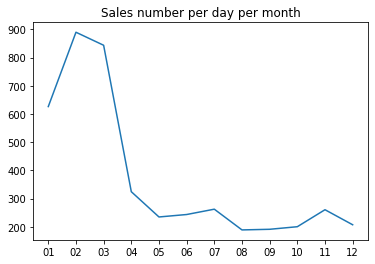

In [6]:
# First year first !
year_1 = group_year.get_group('1997')
# Group by months
group_months_y1 = year_1.groupby('month')
# Get the number of working days per month
wdays_per_month_y1 = group_months_y1['date'].nunique()
# average number CDs sold each day each month
avr_per_month_y1 = group_months_y1['quantity'].sum() / wdays_per_month_y1
display(np.ceil(avr_per_month_y1))
display(avr_per_month_y1.describe())
# Now let's plot it
plt.title('Sales number per day per month')
plt.plot(avr_per_month_y1)
# From that we can see that most CDs are sold during the first trimester of 1997

<h2><font color=yellow>USERS PER MONTH</font></h2>

month
01    7846
02    9633
03    9524
04    2822
05    2214
06    2339
07    2180
08    1772
09    1739
10    1839
11    2028
12    1864
Name: id, dtype: int64


Text(0.5, 1.0, 'Client number per month')

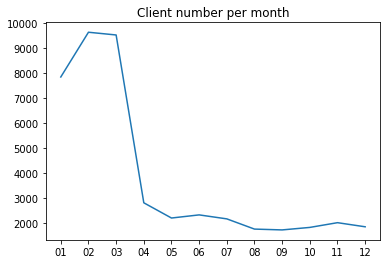

In [7]:
# Evolution of the number of consumers each month
# Number of different consumer having made atleast one purchase each month
user_per_month_y1 = group_months_y1['id'].nunique()
print(user_per_month_y1)
a = plt.plot(user_per_month_y1)
plt.title('Client number per month')
# We can see that sales and consumers numbers are strongly correlated


<h1><font color=red >Analysis by year/month/day 2</font></h1>

month
01    171.0
02    191.0
03    240.0
04    157.0
05    159.0
06    177.0
dtype: float64

count      6.000000
mean     181.940553
std       30.959943
min      156.566667
25%      161.185484
50%      173.245699
75%      187.094048
max      239.709677
dtype: float64

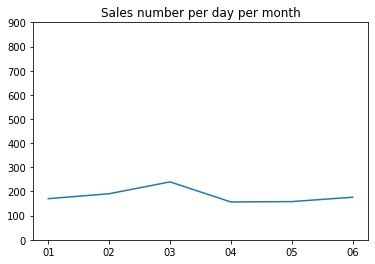

In [8]:
year_2 = group_year.get_group('1998')
# Group by months
group_months_y2 = year_2.groupby('month')
# Get the number of working days per month
wdays_per_month_y2 = group_months_y2['date'].nunique()
# average number CDs sold each month
avr_per_month_y2 = group_months_y2['quantity'].sum() / wdays_per_month_y2
display(np.ceil(avr_per_month_y2))
display(avr_per_month_y2.describe())
plt.title('Sales number per day per month')
plt.ylim((0,900))
plt.plot(avr_per_month_y2)
# Sales have decreased considerably for the first trimester, but are more homogeneous.
# When compared to overall CD sales by year, this decrease seems coherent.

month
01    1537
02    1551
03    2060
04    1437
05    1488
06    1506
Name: id, dtype: int64


Text(0.5, 1.0, 'Client number per month')

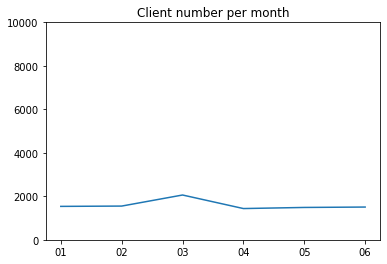

In [9]:
# Evolution of the number of consumers each month
# Number of different consumers having made atleast one purchase each month
user_per_month_y2 = group_months_y2['id'].nunique()
print(user_per_month_y2)
plt.plot(user_per_month_y2)
plt.ylim((0,10000))
plt.title('Client number per month')
# We can see that sales and consumers numbers are stronly correlated


<h1><font color=red>ANALYSIS OF CLIENTS</font></h1>

In [10]:
group_client = data.groupby('id')

In [11]:
# CDs purchase by client
cd_purchase_per_client = group_client['quantity'].sum()

number_purchase_per_client = group_client['quantity'].count()

profit_made_per_client = group_client['cost'].sum()

purchase_std = data['date'].max() - group_client['date'].max()

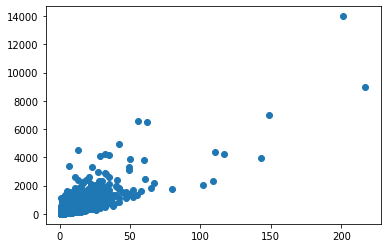

In [12]:
# Here I am trying to determine if profit is related to the number of sales
# i.e is profit generated by a great amount of light purchases or by scarce heavy pucharses ?
# Seems like it's the first option
plt.scatter(number_purchase_per_client, profit_made_per_client)

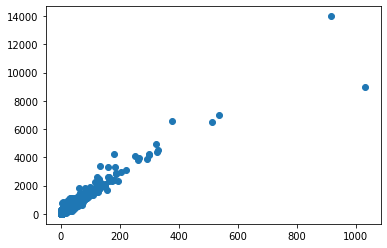

In [13]:
# We can see that the number of sold cds is proportional to the profit 
plt.scatter(cd_purchase_per_client, profit_made_per_client)

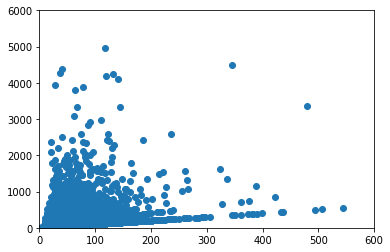

In [14]:
# We can se here too, that customers making a lot of small purchases bring more money on average.
avr_profit_per_transaction = profit_made_per_client / number_purchase_per_client


plt.xlim(0,  600)
plt.ylim(0, 6000)
plt.scatter(avr_profit_per_transaction, profit_made_per_client)


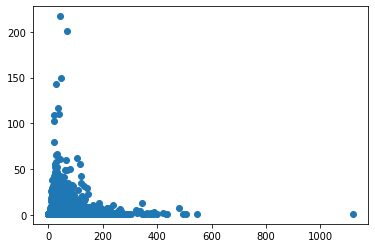

In [15]:
# This is the direct consequence of the previous plot
plt.scatter(avr_profit_per_transaction, number_purchase_per_client)

In [16]:
# 3D interactive plot of profit x nb_purchase x avr_cost_ppurchase
layout = go.Layout(title='Plot Title',
    xaxis=dict(
        title='Revenue',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Purchase',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data = [go.Scatter3d(x=profit_made_per_client, y=number_purchase_per_client, z=avr_profit_per_transaction, 
                                     mode='markers')])

fig.show()




In [ ]:
# Let's if we can get something from customers distribution
first_purchase = group_client['date'].min().dt.month
first_purchase = pd.DataFrame(first_purchase).rename(columns={'date':'month'})
# first_purchase['id'] = first_purchase.index
# first_purchase = first_purchase.groupby('month').count()

fig = go.Figure(data=[go.Histogram(x=first_purchase.month, nbinsx=3)])
fig.show()
# did_purchase = pd.get_dummies()

# We have seen that profit is correlated to the number of individual purchases. Let's try to segment consumers into different categories, depending on how much transactions they make,  we'll also create a column for the total profit generated.

In [18]:
group_id = data.groupby('id')
revenue = group_id['cost'].sum().rename('revenue')
purchase = group_id['quantity'].count().rename("purchase")

# It may also be interesting to get the time elapsed from last purchase
elapsed = ((data['date'].max() - group_id['date'].max()).dt.days)
# and the standart deviation of purchases
purchase_std = group_id['day_to_last_date'].std().fillna(0).rename('purchase_std')
# display(purchase_std)


kmean_train_set = pd.concat([revenue, purchase, elapsed.rename("elapsed")], axis=1)
display(kmean_train_set.head())


,revenue,purchase,elapsed
id,,,
1,11.77,1,545
2,89.00,2,534
3,156.46,6,33
4,100.50,4,200
5,385.61,11,178


In [19]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(kmean_train_set)
display(kmean_train_set.head())
display(scaled_train)

,revenue,purchase,elapsed
id,,,
1,11.77,1,545
2,89.00,2,534
3,156.46,6,33
4,100.50,4,200
5,385.61,11,178


array([[-0.39145938, -0.41284215,  0.98107709],
       [-0.07089664, -0.20171391,  0.92037314],
       [ 0.20911322,  0.64279906, -1.84441563],
       ...,
       [ 0.06483301,  0.00941433,  0.36851909],
       [-0.33347334, -0.41284215,  0.52303823],
       [-0.04981081, -0.20171391,  0.51751969]])

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


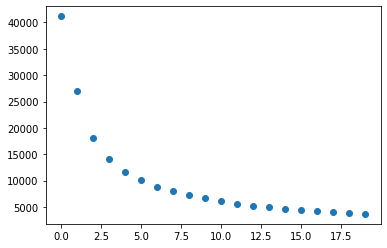

In [20]:
x = range(0, 20)
y = []
for i in range(2,22):
    print(i)
    Kmean = KMeans(n_clusters=i, n_jobs=-1)
    Kmean.fit(scaled_train)
    y.append(Kmean.inertia_)

plt.scatter(x,y)


# Let's try to predict cost for one individual, form previous analysis we have seen that intersting variables are : number of purchase, profit per transaction, total revenue

In [21]:
# first 39 weeks
data_p1 = data.loc[data['date'] <= pd.datetime(1997, 10, 1)]
# last 39 weaks
data_p2 = data.loc[data['date'] > pd.datetime(1997, 10, 1)]
display(data_p1.head())
display(data_p2.head())

# group by id for p1
group_id_p1 = data_p1.groupby('id')
revenue = group_id_p1['cost'].sum().rename('revenue')
purchase = group_id_p1['quantity'].count().rename("purchase")
mean_revenue = group_id_p1['cost'].mean().rename("mean_revenue")
mean_cd = group_id_p1['quantity'].sum().rename("mean_cd")

# group by id for p2
group_id_p2 = data_p2.groupby('id')
p2_revenue = group_id_p2['cost'].sum()
print(p2_revenue.index)

train_set = pd.concat([revenue, purchase, mean_revenue, mean_cd], axis=1)

# labels correspond to the revenue per customer in part_2
# if no purchase were made, labels = 0
labels = p2_revenue.reindex(train_set.index, fill_value=0)



,id,date,quantity,cost,year,month,day,day_to_last_date
0,1,1997-01-01,1,11.77,1997,01,01,545
802,216,1997-01-01,1,13.97,1997,01,01,545
337,89,1997-01-01,3,47.08,1997,01,01,545
803,217,1997-01-01,2,57.54,1997,01,01,545
808,219,1997-01-01,3,38.51,1997,01,01,545


,id,date,quantity,cost,year,month,day,day_to_last_date
36525,11988,1997-10-02,1,11.49,1997,10,02,271
35625,11682,1997-10-02,2,24.48,1997,10,02,271
1674,499,1997-10-02,1,9.49,1997,10,02,271
58999,19710,1997-10-02,2,21.98,1997,10,02,271
31954,10344,1997-10-02,3,45.47,1997,10,02,271


Int64Index([    3,     4,     5,     7,     8,     9,    11,    24,    25,
               29,
            ...
            23537, 23540, 23544, 23554, 23555, 23556, 23558, 23561, 23563,
            23564],
           dtype='int64', name='id', length=7039)


In [22]:
display(train_set.head())

,revenue,purchase,mean_revenue,mean_cd
id,,,,
1,11.77,1,11.770000,1
2,89.00,2,44.500000,6
3,61.06,3,20.353333,6
4,74.02,3,24.673333,5
5,261.21,8,32.651250,19


In [23]:
train_set.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")
# We can see that mean_cd is strongly correlated to other columns, 
# which means we won't be able to extract much information from it
# So we remove it to prevent overfitting

In [24]:
train_set = train_set.drop(['mean_cd'], axis=1)

display(train_set.head())

,revenue,purchase,mean_revenue
id,,,
1,11.77,1,11.770000
2,89.00,2,44.500000
3,61.06,3,20.353333
4,74.02,3,24.673333
5,261.21,8,32.651250


In [25]:
train_set.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")

In [26]:
# It may also be interesting to get the time elapsed from last purchase
elapsed = (data_p1['date'].max() - group_id_p1['date'].min()).dt.days
# and the standart deviation of purchases
purchase_std = group_id_p1['day_to_last_date'].std().fillna(0)
# display(purchase_std)
train_set['elapsed'] = elapsed
# train_set['purchase_std'] = purchase_std

# train_set = train_set.drop('elapsed', axis=1)
train_set.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")
display(train_set.head())

,revenue,purchase,mean_revenue,elapsed
id,,,,
1,11.77,1,11.770000,273
2,89.00,2,44.500000,262
3,61.06,3,20.353333,272
4,74.02,3,24.673333,273
5,261.21,8,32.651250,273


In [ ]:
# Create a numpy array containing our dateset with normalized features
scaler = StandardScaler()

train = np.array(scaler.fit_transform(train_set))

# Let's try to separate data into clusters using kmeans

# whitened = whiten(train)
x = range(0, 39)
y = []
for i in range(1,40):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(train)
    y.append(Kmean.inertia_)

plt.scatter(x,y)

In [ ]:
x = range(0,39)
print(x,y)
plt.scatter(x,y)
print(Kmean.labels_)

# Clustering does not seem to bear fruits..
Let's try regression

In [ ]:
# Split training set and labels into training and testing sets (3/4 ratio)
# Labels are the cost
# train_set = train_set.drop('mean_revenue', axis=1)
# train_set = train_set.drop('purchase_std', axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_set, 
                                                    np.array(labels), test_size=0.25, random_state=32)




In [ ]:
# Normalize data uniformly i.e same mean and std for both training and testing sets
fit = StandardScaler()
X_train = fit.fit_transform(X_train)
X_test = fit.transform(X_test)
print(X_test)
print(X_train.shape)


In [ ]:
# Let's first try the simplest possible model : Linear regression
lin_reg = LinearRegression()
poly = PolynomialFeatures(degree=1)
add_one_to_X = poly.fit_transform(X_train)
lin_reg.fit(add_one_to_X, y_train)
lin_reg.score(poly.fit_transform(X_test), y_test)

In [ ]:
# Not quite impressive
# Let's try polynomial regression
for d in range(1, 10):
    poly = PolynomialFeatures(degree=d)

    pol_X_train = poly.fit_transform(X_train)
    pol_X_test = poly.fit_transform(X_test)
    
    reg_lin_reg = Ridge(alpha=0.2, solver='sparse_cg', max_iter=10000)

    reg_lin_reg.fit(pol_X_train, y_train)
    pred = reg_lin_reg.predict(pol_X_test)
#     print(pred)
#     print(y_test)
    print(reg_lin_reg.score(pol_X_test, y_test))
    print(np.abs(pred - y_test).sum())
#     print(reg_lin_reg.score(pol_X_train, y_train))


In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(10, 5), activation='logistic', solver='adam', max_iter=1000, alpha=0.1)

In [ ]:
MLP.fit(X_train, y_train)

In [ ]:
MLP.score(X_test, y_test)